In [8]:
import os
import pandas as pd
import numpy as np
import helpers

from sklearn.model_selection import train_test_split


In [9]:
organism = 'atha'

In [26]:
df = pd.read_csv('./data/cub2.csv', index_col=0)

df['actual_binary'] = np.where(df['median_exp'] > np.median(df['median_exp'].values), 1, 0)

low, high = df.median_exp.quantile([0.33, 0.67])
high_l = np.where(df['median_exp'] > high, 2, 0)
low_l = np.where(df['median_exp'] > low, 0, 1)
df['actual_multi'] = high_l+low_l

df = df[df['species'] == organism]

In [459]:
#set(df['species'])

In [4]:
df = helpers.add_codons_to_df(df, 'Sequence')
df.columns

Index(['GeneName', 'median_exp', 'Sequence', 'species', 'mlphi_est', 'CAI',
       'CAI2', 'actual_binary', 'actual_multi', 'codons_cleaned'],
      dtype='object')

In [5]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1234)

In [41]:
df_test

,GeneName,median_exp,Sequence,species,mlphi_est,CAI,CAI2,actual_binary,actual_multi,codons_cleaned,BERT-CUB-b,BERT-CUB-m,log_median_exp
2398,RPL24A,482.00,ATGGTTCTCAAGACTGAGCTTTGCCGATTCAGTGGCCAGAAAATTT...,atha,0.125871,0.751650,0.786549,1,2,ATG GTT CTC AAG ACT GAG CTT TGC CGA TTC AGT GG...,0.008931,0.007089,6.177944
4612,TRE1,0.20,ATGAAATCATACAAACTTAATAACCCTAATTTACTCATCTCCACGC...,atha,0.077560,0.724789,0.762796,0,1,ATG AAA TCA TAC AAA CTT AAT AAC CCT AAT TTA CT...,0.008917,0.007104,-1.609438
2342,MEE23,0.40,ATGGCGTTTGCGATATCAAAGCGAAACGCAACCTTGTTTCTTGTAA...,atha,0.115377,0.779762,0.707641,0,1,ATG GCG TTT GCG ATA TCA AAG CGA AAC GCA ACC TT...,0.008877,0.007076,-0.916291
3654,WNK3,0.15,ATGCGACAAGACGAGAATAACTCCGAGGAAGAATTCGTTGAGATTG...,atha,0.075810,0.818798,0.769105,0,1,ATG CGA CAA GAC GAG AAT AAC TCC GAG GAA GAA TT...,0.008942,0.007087,-1.897120
5055,SK2,16.50,ATGGAAGCAGCTACTGTTCAGAGGTTTCAGTACTCATCATGGAATG...,atha,0.038033,0.782044,0.797711,1,0,ATG GAA GCA GCT ACT GTT CAG AGG TTT CAG TAC TC...,0.008900,0.007083,2.803360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,RFNR1,26.50,ATGGCTCTCTCAACTACTCCTTCTCAGATGTCCGTTGCACTTCCAA...,atha,0.061469,0.762716,0.782223,1,0,ATG GCT CTC TCA ACT ACT CCT TCT CAG ATG TCC GT...,0.008933,0.007088,3.277145
1567,ADH1,67.00,ATGTCTACCACCGGACAGATTATTCGATGCAAAGCTGCTGTGGCAT...,atha,0.085738,0.810228,0.787752,1,2,ATG TCT ACC ACC GGA CAG ATT ATT CGA TGC AAA GC...,0.008940,0.007092,4.204693
4671,PSD3,35.50,ATGGGAAACGGAAACTCAACGGAGACGAAAGAGTCGCGCCGATCAA...,atha,0.071900,0.795282,0.770060,1,2,ATG GGA AAC GGA AAC TCA ACG GAG ACG AAA GAG TC...,0.008950,0.007090,3.569533
11,RABA3,2.00,ATGAACGAAGAGATGAGCGGTGAGTCGCCGGAGAATAACAAACACG...,atha,0.141099,0.828834,0.704912,0,1,ATG AAC GAA GAG ATG AGC GGT GAG TCG CCG GAG AA...,0.008911,0.007083,0.693147


In [19]:
df2 = pd.read_csv('./data/atha_exp.csv',index_col=0)
df2['log_median_exp'] = 

In [28]:
df2

,text,label,BERT-CUB-b,BERT-CUB-m
2398,ATG GTT CTC AAG ACT GAG CTT TGC CGA TTC AGT GG...,482.00,0.008994,0.007096
4612,ATG AAA TCA TAC AAA CTT AAT AAC CCT AAT TTA CT...,0.20,0.008931,0.007089
2342,ATG GCG TTT GCG ATA TCA AAG CGA AAC GCA ACC TT...,0.40,0.008917,0.007104
3654,ATG CGA CAA GAC GAG AAT AAC TCC GAG GAA GAA TT...,0.15,0.008877,0.007076
5055,ATG GAA GCA GCT ACT GTT CAG AGG TTT CAG TAC TC...,16.50,0.008942,0.007087
...,...,...,...,...
4180,ATG GCT CTC TCA ACT ACT CCT TCT CAG ATG TCC GT...,26.50,0.008924,0.007085
1567,ATG TCT ACC ACC GGA CAG ATT ATT CGA TGC AAA GC...,67.00,0.008933,0.007088
4671,ATG GGA AAC GGA AAC TCA ACG GAG ACG AAA GAG TC...,35.50,0.008940,0.007092
11,ATG AAC GAA GAG ATG AGC GGT GAG TCG CCG GAG AA...,2.00,0.008950,0.007090


In [20]:
l = []

with open('./results/codonBERT_binary_reg_output_{}-pre-norm2.txt'.format(organism), 'r') as file:
    lines = file.readlines()
    
    for line in lines:
        l.append(float(line[1:-2]))

#df_test['BERT-CUB-b'] = l
#df_test['BERT-CUB-b'] = l[1:]
df2['BERT-CUB-b'] = l[:-1]

In [21]:
l = []

with open('./results/codonBERT_multi_reg_output_{}-pre-norm2.txt'.format(organism), 'r') as file:
    lines = file.readlines()
    
    for line in lines:
        l.append(float(line[1:-2]))
        
#df_test['BERT-CUB-m'] = l
#df_test['BERT-CUB-m'] = l[1:]
df2['BERT-CUB-m'] = l[:-1]

In [22]:
df_test['log_median_exp'] = np.log(df_test['median_exp'])

In [23]:
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

def spearman_plot(df, y_col, x_col, title, c_s='#068cf9', c_l='#ff0051'):
    rho, p = spearmanr(df[y_col], df[x_col], nan_policy='omit')
    
    #df = df.sample(32)
    ax = sns.lmplot(df, x=x_col, y=y_col, scatter_kws={'color': c_s}, line_kws={'color': c_l})
    ax.fig.text(0.25, 0.9, 'r_s = '+str(round(rho, 3)), color=c_l)
    
    plt.title(title)
    plt.xlabel('Median Expression (log)')
    plt.ylabel('Predicted Expression')
    
    plt.show()
    plt.clf()

In [29]:
df2['actual_binary'] = np.where(df2['label'] > np.median(df['median_exp'].values), 1, 0)

low, high = df.median_exp.quantile([0.33, 0.67])
high_l = np.where(df2['label'] > high, 2, 0)
low_l = np.where(df2['label'] > low, 0, 1)
df2['actual_multi'] = high_l+low_l

#df2 = df[df['species'] == organism]

In [30]:
df2['log_median_exp'] = np.log(df2['label'])

In [42]:
df_test_low = df_test[df_test['actual_multi'] == 1]
df_test_med = df_test[df_test['actual_multi'] == 0]
df_test_high = df_test[df_test['actual_multi'] == 2]

In [55]:
l = []

with open('./results/codonBERT_binary_reg_output_{}-pre-norm2.txt'.format(organism), 'r') as file:
    lines = file.readlines()
    
    for line in lines:
        l.append(float(line[1:-2]))
        
l2 = []

with open('./results/codonBERT_binary_reg_labels_{}-pre-norm2.txt'.format(organism), 'r') as file:
    lines = file.readlines()
    
    for line in lines:
        l2.append(float(line))

z = zip(l, l2)
z = list(z)

df = pd.DataFrame(z, columns=['preds', 'labels'])

In [66]:
l = []

with open('./results/codonBERT_multi_reg_output_{}-pre-norm2.txt'.format(organism), 'r') as file:
    lines = file.readlines()
    
    for line in lines:
        l.append(float(line[1:-2]))
        
l2 = []

with open('./results/codonBERT_multi_reg_labels_{}-pre-norm2.txt'.format(organism), 'r') as file:
    lines = file.readlines()
    
    for line in lines:
        l2.append(float(line))

z = zip(l, l2)
z = list(z)

df = pd.DataFrame(z, columns=['preds', 'labels'])

In [68]:
#df = pd.read_csv('./data/cub2.csv', index_col=0)

df['actual_binary'] = np.where(df['labels'] > np.median(df['labels'].values), 1, 0)

low, high = df.labels.quantile([0.33, 0.67])
high_l = np.where(df['labels'] > high, 2, 0)
low_l = np.where(df['labels'] > low, 0, 1)
df['actual_multi'] = high_l+low_l


In [69]:
df_test_low = df[df['actual_multi'] == 1]
df_test_med = df[df['actual_multi'] == 0]
df_test_high = df[df['actual_multi'] == 2]

In [468]:
len(df_test_low)

415

In [32]:
df_test_med = df_test_med#.sample(32)

In [33]:
df_test_high = df_test_high#.sample(32)

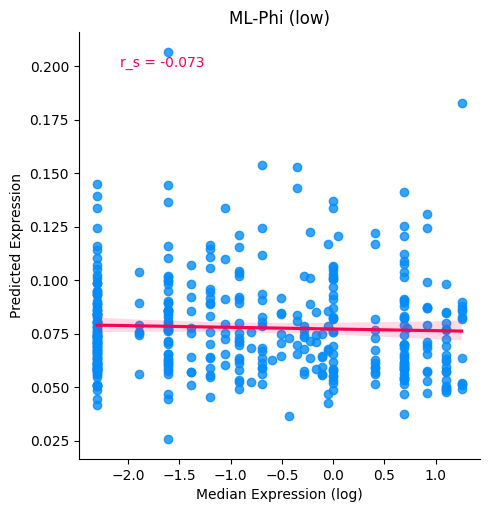

<Figure size 640x480 with 0 Axes>

In [43]:
spearman_plot(df_test_low, 'mlphi_est', 'log_median_exp', 'ML-Phi (low)')

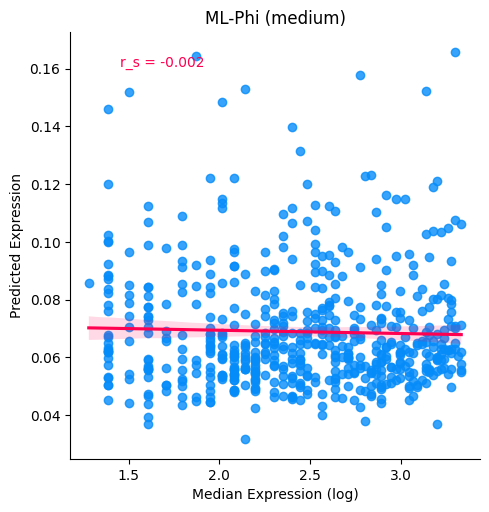

<Figure size 640x480 with 0 Axes>

In [44]:
spearman_plot(df_test_med, 'mlphi_est', 'log_median_exp', 'ML-Phi (medium)')

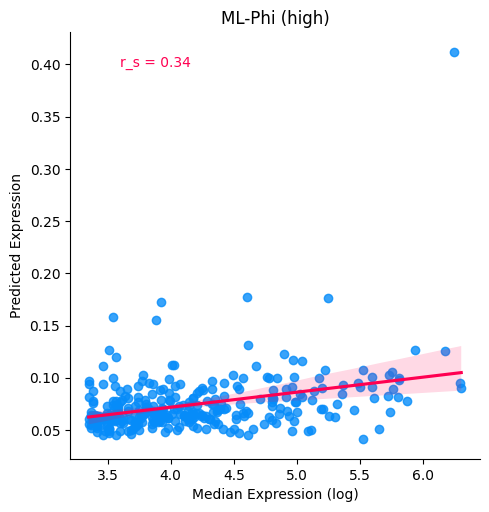

<Figure size 640x480 with 0 Axes>

In [45]:
spearman_plot(df_test_high, 'mlphi_est', 'log_median_exp', 'ML-Phi (high)')

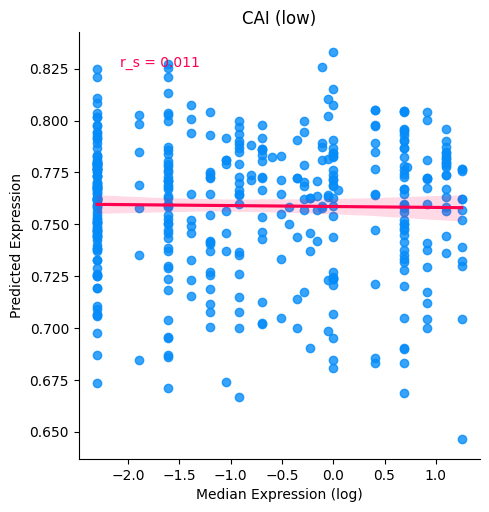

<Figure size 640x480 with 0 Axes>

In [46]:
spearman_plot(df_test_low, 'CAI2', 'log_median_exp', 'CAI (low)')

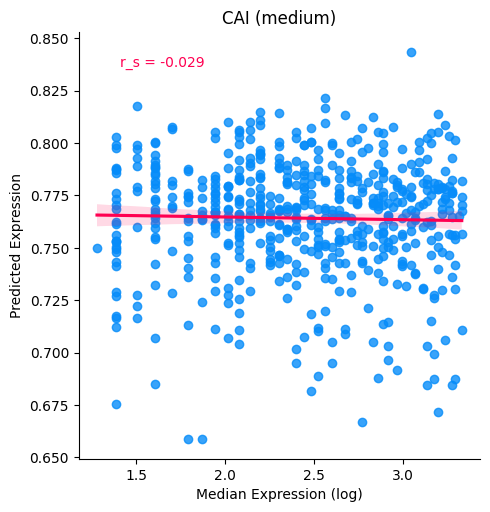

<Figure size 640x480 with 0 Axes>

In [47]:
spearman_plot(df_test_med, 'CAI2', 'log_median_exp', 'CAI (medium)')

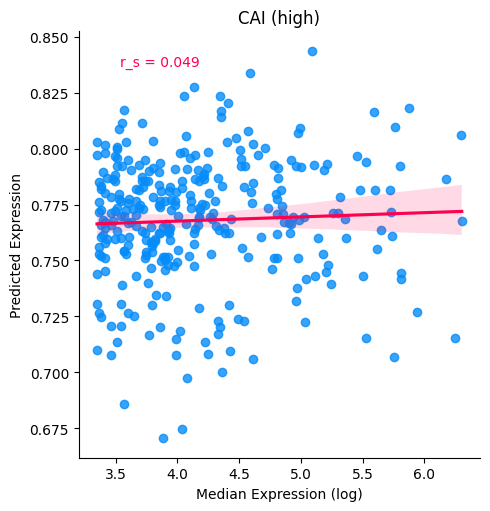

<Figure size 640x480 with 0 Axes>

In [48]:
spearman_plot(df_test_high, 'CAI2', 'log_median_exp', 'CAI (high)')

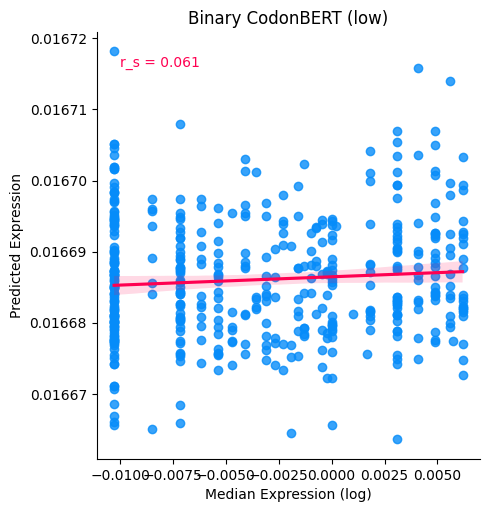

<Figure size 640x480 with 0 Axes>

In [63]:
spearman_plot(df_test_low, 'preds', 'labels', 'Binary CodonBERT (low)')

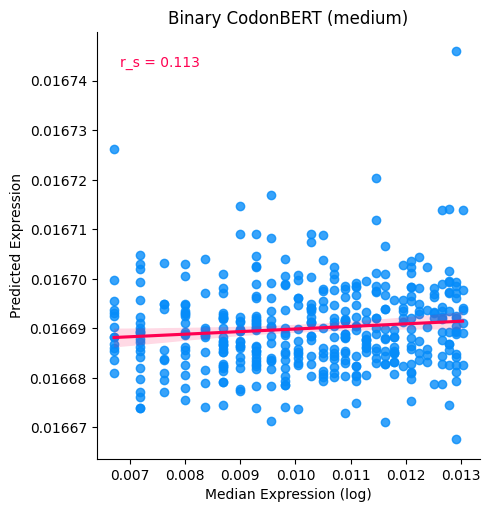

<Figure size 640x480 with 0 Axes>

In [64]:
spearman_plot(df_test_med, 'preds', 'labels', 'Binary CodonBERT (medium)')

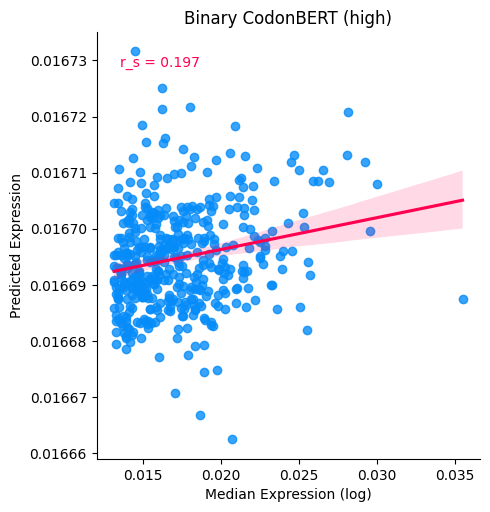

<Figure size 640x480 with 0 Axes>

In [65]:
spearman_plot(df_test_high, 'preds', 'labels', 'Binary CodonBERT (high)')

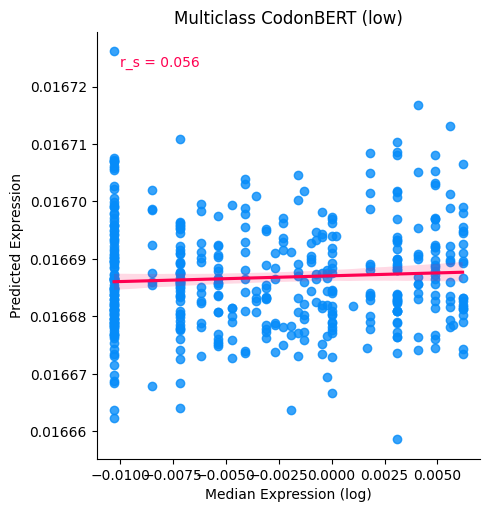

<Figure size 640x480 with 0 Axes>

In [70]:
spearman_plot(df_test_low, 'preds', 'labels', 'Multiclass CodonBERT (low)')

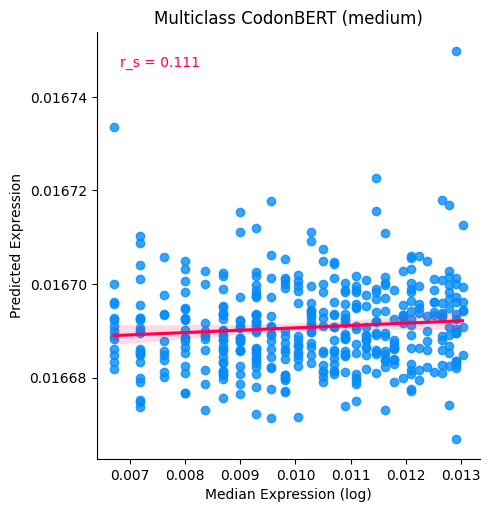

<Figure size 640x480 with 0 Axes>

In [71]:
spearman_plot(df_test_med, 'preds', 'labels', 'Multiclass CodonBERT (medium)')

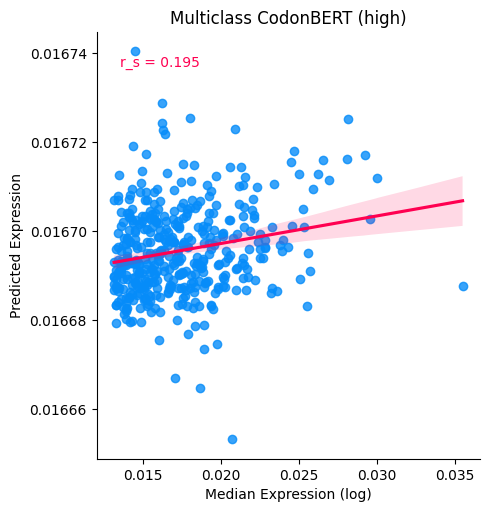

<Figure size 640x480 with 0 Axes>

In [72]:
spearman_plot(df_test_high, 'preds', 'labels', 'Multiclass CodonBERT (high)')